<a href="https://colab.research.google.com/github/captain7oxic/Pytorch_practice/blob/main/pytorch_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
!pip install torchvision

--2023-06-16 09:07:26--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import torch
from torchvision import transforms, datasets
import helper

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])

#importing the train data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/' , download = True,train = True , transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64,shuffle = True)



#importing the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/' , download = True,train = False,transform = transform)
testloader = trainloader = torch.utils.data.DataLoader(testset,batch_size = 64,shuffle=True)



In [10]:
img,label = next(iter(trainloader))

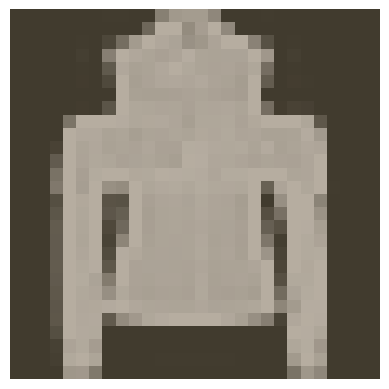

In [12]:
helper.imshow(img[0,:]);


In [21]:
from torch import nn
from torch.nn.modules.activation import LogSoftmax
#creating a neural network architechture

network  = nn.Sequential(
    nn.Linear(784,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)

In [22]:
#training the network

from torch import optim

optimizer  = optim.SGD(network.parameters(),lr=0.3)

criterion = nn.NLLLoss()
epochs = 10

for e in range(epochs):
  running_loss =0
  for img, label in trainloader:
    img = img.view(img.shape[0],-1)
    #forward pass
    logits = network(img)

    #remove accumulated gradients
    optimizer.zero_grad()

    #loss
    loss = criterion(logits,label)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
            print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 1.1380189588874767
Training loss: 0.685288666350067
Training loss: 0.5999047860598109
Training loss: 0.522880454067212
Training loss: 0.4906509976098492
Training loss: 0.4571187808445305
Training loss: 0.4403867293505152
Training loss: 0.4305985646832521
Training loss: 0.3932231124609139
Training loss: 0.39242572788220303


In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!


images, labels = next(iter(testloader))
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(network(img))

# Plot the image and probabilitiesw
helper.view_classify(img, ps, version='Fashion')

RuntimeError: ignored

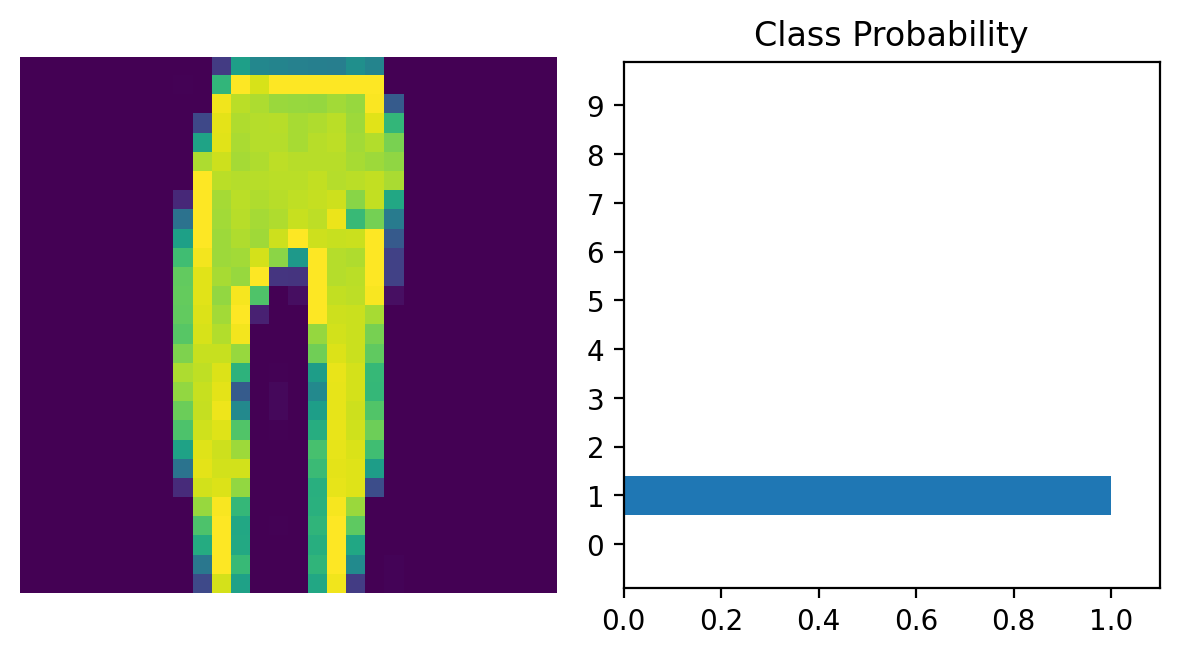

In [32]:
%matplotlib inline
import helper

images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = network(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

AttributeError: ignored